In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 68 columns):
Province/State    74 non-null object
Country/Region    245 non-null object
Lat               245 non-null float64
Long              245 non-null float64
1/22/20           245 non-null int64
1/23/20           245 non-null int64
1/24/20           245 non-null int64
1/25/20           245 non-null int64
1/26/20           245 non-null int64
1/27/20           245 non-null int64
1/28/20           245 non-null int64
1/29/20           245 non-null int64
1/30/20           245 non-null int64
1/31/20           245 non-null int64
2/1/20            245 non-null int64
2/2/20            245 non-null int64
2/3/20            245 non-null int64
2/4/20            245 non-null int64
2/5/20            245 non-null int64
2/6/20            245 non-null int64
2/7/20            245 non-null int64
2/8/20            245 non-null int64
2/9/20            245 non-null int64
2/10/20           245 non-null int64
2/

In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 68 columns):
Province/State    74 non-null object
Country/Region    245 non-null object
Lat               245 non-null float64
Long              245 non-null float64
1/22/20           245 non-null int64
1/23/20           245 non-null int64
1/24/20           245 non-null int64
1/25/20           245 non-null int64
1/26/20           245 non-null int64
1/27/20           245 non-null int64
1/28/20           245 non-null int64
1/29/20           245 non-null int64
1/30/20           245 non-null int64
1/31/20           245 non-null int64
2/1/20            245 non-null int64
2/2/20            245 non-null int64
2/3/20            245 non-null int64
2/4/20            245 non-null int64
2/5/20            245 non-null int64
2/6/20            245 non-null int64
2/7/20            245 non-null int64
2/8/20            245 non-null int64
2/9/20            245 non-null int64
2/10/20           245 non-null int64
2/

In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/andres/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


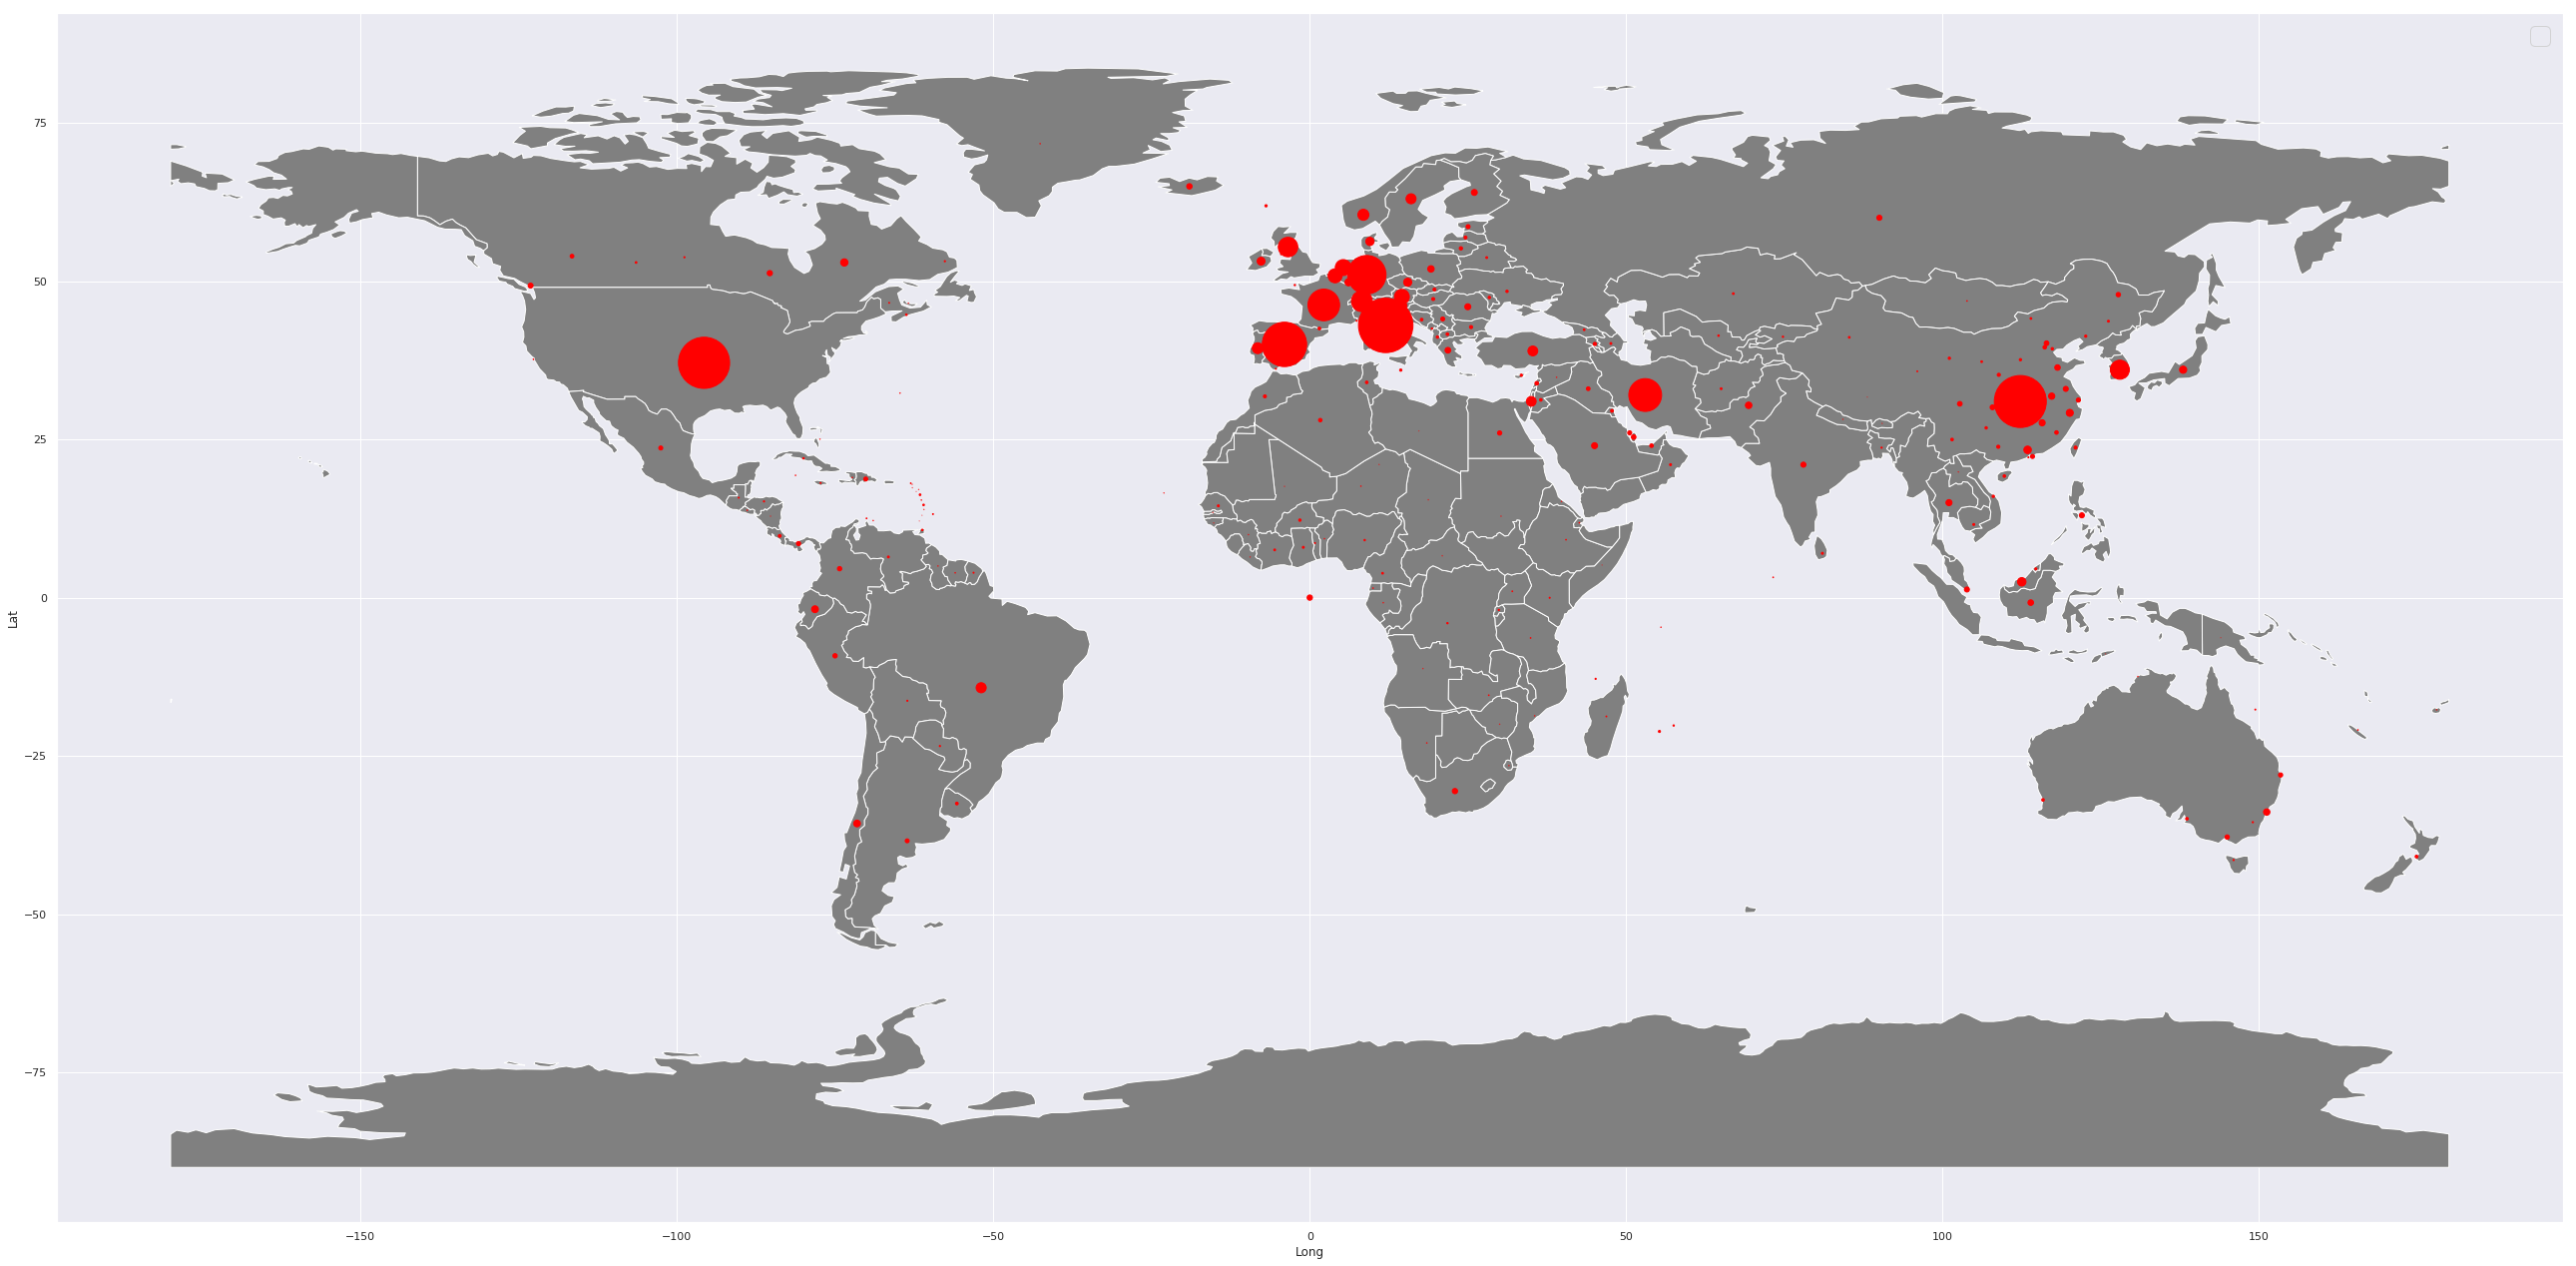

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)


In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()

In [17]:
#Final Data Frames including only countries which we want to study

cases = cases_country_only.loc[['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']]
deaths = deaths_country_only.loc[['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']]
cases = cases.T
deaths = deaths.T

In [18]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)

In [19]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [20]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0


In [21]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0


In [22]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [23]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
3/5/20,0,0,0,0,0,0,1,0,0,0
3/6/20,1,0,0,0,0,0,2,0,0,0
3/7/20,1,0,0,0,0,0,2,0,0,0
3/8/20,5,0,0,0,0,0,5,0,0,0
3/9/20,9,0,0,0,0,0,5,0,0,0


In [24]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
3/5/20,0,0,0,0,0,0,0,0,0,0
3/6/20,0,0,0,0,0,0,0,0,0,0
3/7/20,0,0,0,0,0,0,0,0,0,0
3/8/20,0,0,0,0,0,0,0,0,0,0
3/9/20,0,0,0,0,0,0,0,0,0,0


In [29]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [37]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i-1,j] = 0
            else:
                zeros[i-1,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [38]:
camcar_gf = growth_factor_df(cases_camcar)

In [39]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/5/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
3/6/20,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/7/20,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000
3/8/20,1.800000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/9/20,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [40]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)